In [1]:
import pandas                                    #导入pandas库，这个库是专门设计用来做数据分析的工具
titanic=pandas.read_csv('train.csv')      #读取文件titanic_train数据集
print(titanic.describe())                        #describe()函数是用来描述数据属性的，然后print打印出来

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


D:\Anaconda\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [2]:
#机器学习中输入的数据集要求是M*N的矩阵，Age列有缺失值，median（）函数代表去均值
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())   #fillna（）表示补充，median（）表示求平均值
print(titanic.describe())                                      #再看看表的变化

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [3]:
print(titanic['Sex'].unique())  #返回其参数数组中所有不同的值，并且按照从小到大的顺序排列
#loc是通过行标签索引行数据，iloc是通过行号获取行数据， ix是结合前两种的混合索引
#注意loc后面加的是中括号，不是小括号
titanic.loc[titanic['Sex']=='male','Sex']=0
titanic.loc[titanic['Sex']=='female','Sex']=1

['male' 'female']


In [4]:
print(titanic['Embarked'].unique())
titanic['Embarked']=titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked']=='S','Embarked']=0
titanic.loc[titanic['Embarked']=='C','Embarked']=1
titanic.loc[titanic['Embarked']=='Q','Embarked']=2

['S' 'C' 'Q' nan]


In [19]:
#在线性模型模块中导入线性回归
#交叉验证，把训练数据集分成三份。最后去平均值
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
 
#这里的数据都对预测生存有影响
predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
 
#把线性回归导进来
alg=LinearRegression()
 
#选择做几倍的交叉验证，n_folds意思是几倍
kf=KFold(n_splits=3,random_state=1)
 
predictions=[]
for train,test in kf.split(titanic):
    #意思是把训练数据拿出来
    train_predictors=(titanic[predictors].iloc[train,:])
    #the target we're using to train the algorithm
    train_target=titanic['Survived'].iloc[train]
    #把线性回归应用在train_pridictors,train_target数据集上
    alg.fit(train_predictors,train_target)
    #we can now make predictors on the test fold
    test_predictions=alg.predict(titanic[predictors].iloc[test,:])
    test_predictions[test_predictions>.5]=1
    test_predictions[test_predictions<=.5]=0
    score = accuracy_score(titanic['Survived'].iloc[test],test_predictions)
    print(score)
    #我们要进行预测，是要对测试集进行预测
    predictions.append(score)
print(np.mean(predictions))

0.7811447811447811
0.7811447811447811
0.7878787878787878
0.7833894500561168


In [20]:
#这里用的是逻辑回归的算法方式
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
#Initialize our algorithm
alg=LogisticRegression(random_state=1)
#Compute the accuracy score for all the cross validation folds.(much simpler than what we did before!)
scores=cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=3)
#Take the mean of the scores(because we have one for each fold)
print(scores.mean())

0.7878787878787877


In [21]:
#以下用的是随机森林的算法方式
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
 
predictors=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
 
#这里后面的samples不要少写一个“s”
#n_estimators是决策树的个数，min_samples_split是根据属性划分节点时，每个划分最少的样本数。min_samples_leaf:叶子节点最少的样本数。
alg=RandomForestClassifier(random_state=1,n_estimators=100,min_samples_split=4,min_samples_leaf=2)
 
kf=cross_validation.KFold(titanic.shape[0],n_folds=3,random_state=1)
scores=cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)
 
print(scores.mean()) 


D:\Anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8148148148148148


In [22]:
# Generating a familysize column
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]

# The .apply method generates a new series
titanic["NameLength"] = titanic["Name"].apply(lambda x:len(x)) # 名字长度

In [29]:
import re
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""

titles = titanic["Name"].apply(get_title)
print(pandas.value_counts(titles))

# Map each title to an interger.Some titles are very rare,and are compressed into the same codes as other
title_mapping = {"Dona": 1, "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pandas.value_counts(titles))

# Add in the title column
titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Lady          1
Jonkheer      1
Don           1
Ms            1
Countess      1
Sir           1
Capt          1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


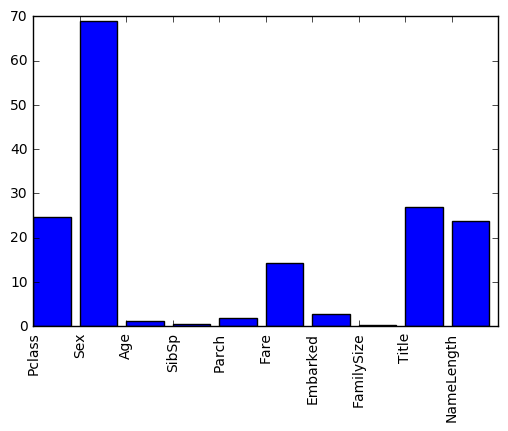

In [30]:
import numpy as np
from sklearn.feature_selection import SelectKBest ,f_classif
import matplotlib.pyplot as plt

predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","Title","NameLength"]

# perform feature selection
selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic["Survived"])

#Get the raw p-values for each feature,and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()

# Pick only the four best features.
predictors = ["Pclass","Sex","Fare","Title"]

alg = RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=8,min_samples_leaf=4)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier 
import numpy as np

algorithms = [
   [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),["Pclass","Sex","Age","Fare","Embarked","FamilySize","Title"]],
   [LogisticRegression(random_state=1),["Pclass","Sex","Age","Fare","FamilySize","Title","Embarked"]]
]

kf = KFold(n_splits=3,random_state=1)

predictions = []
for train,test in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    for alg,predicotrs in algorithms:
    # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:],train_target)
    # Select and predict on the test fold.
    # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1])/2
    test_predictions[test_predictions <= .5] =0
    test_predictions[test_predictions >.5] = 1
    score = accuracy_score(titanic['Survived'].iloc[test],test_predictions)
    print(score)
    #我们要进行预测，是要对测试集进行预测
    predictions.append(score)
print(np.mean(predictions))

0.8080808080808081
0.8249158249158249
0.8215488215488216
0.8181818181818182
